<a href="https://colab.research.google.com/github/Abhiram-108/CSE-LAB-303/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/knn.csv')
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
df.head()



,Weight(x2),Height(y2),Class
0,51,167,Underweight
1,66,177,Normal
2,75,169,Overweight
3,69,176,Normal
4,50,173,Underweight


In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

In [38]:
df.shape

(25, 3)

In [39]:
df.head()

,Weight(x2),Height(y2),Class
0,51,167,2
1,66,177,0
2,75,169,1
3,69,176,0
4,50,173,2


In [40]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
x


array([[ 51, 167],
       [ 66, 177],
       [ 75, 169],
       [ 69, 176],
       [ 50, 173],
       [ 82, 170],
       [ 65, 172],
       [ 58, 180],
       [ 68, 162],
       [ 63, 165],
       [ 52, 174],
       [ 58, 169],
       [ 78, 162],
       [ 65, 168],
       [ 62, 183],
       [ 72, 180],
       [ 80, 180],
       [ 60, 178],
       [ 57, 173],
       [ 73, 164],
       [ 53, 170],
       [ 74, 182],
       [ 72, 175],
       [ 53, 163],
       [ 55, 180]])

In [41]:
y

array([2, 0, 1, 0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 2, 0, 1, 2, 0,
       1, 0, 2])

In [42]:
train_size = int(0.8 * len(x))
x_train = x[:train_size]
y_train = y[:train_size]
x_test = x[train_size:]
y_test = y[train_size:]

In [43]:
def knn_classifier(X_train, y_train, X_test, k):
    predictions = []
    for test_sample in X_test:

     distances = np.sqrt(np.sum((X_train - test_sample)**2, axis=1))
     nearest_indices = np.argsort(distances)[:k]
     nearest_labels = y_train[nearest_indices]

     prediction = np.bincount(nearest_labels).argmax()

     predictions.append(prediction)
    return predictions


In [44]:
k_values = range(1, 11)
accuracies = []
for k in k_values:
    predictions = knn_classifier(x_train, y_train, x_test, k)
    accuracy = np.mean(predictions == y_test)
    accuracies.append(accuracy)

Best k value: 2


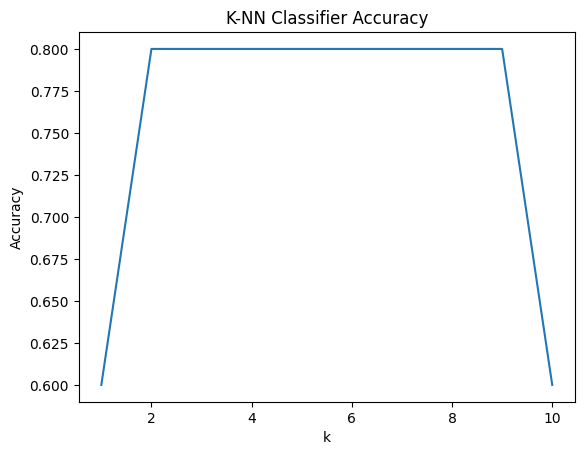

In [45]:
best_k = k_values[np.argmax(accuracies)]
print("Best k value:", best_k)
import matplotlib.pyplot as plt
plt.plot(k_values, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("K-NN Classifier Accuracy")
plt.show()

In [46]:
from sklearn.metrics import confusion_matrix
predictions = knn_classifier(x_train, y_train, x_test, best_k)
confusion_mat = confusion_matrix(y_test, predictions)

In [47]:
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[2 0 0]
 [1 0 0]
 [0 0 2]]
